Team Gordon

Student Name	Student Number
 Alisha Sahota	20497348
 Anthony Ramelo	20499391
 Chris Wu	10182394
 Elizabeth Zhang	20161231
 Emily Zhao	10096273
 Sam Hossain	20466500


In [16]:
# # Import necessary libraries
# import os
# import pandas as pd
# import numpy as np
# from datetime import datetime
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# # Set plot style
# sns.set(style='whitegrid')

# # Constants
# OUTPUT_DIR = 'output_engagement'
# os.makedirs(OUTPUT_DIR, exist_ok=True)
# CURRENT_YEAR = datetime.now().year

# # Functions

# def load_data(file_path, sheet_name):
#     """
#     Load data from an Excel file and strip whitespace from column names.
#     """
#     df = pd.read_excel(file_path, sheet_name=sheet_name)
#     df.columns = df.columns.str.strip()
#     return df

# def ensure_column_exists(df, column_name, alternative_names=None):
#     """
#     Ensure a specific column exists in the DataFrame, possibly under alternative names.
#     """
#     if column_name in df.columns:
#         return column_name
#     if alternative_names:
#         for alt_name in alternative_names:
#             if alt_name in df.columns:
#                 df.rename(columns={alt_name: column_name}, inplace=True)
#                 return column_name
#     raise ValueError(f"Column '{column_name}' or alternatives {alternative_names} not found.")

# def create_engagement_features(df):
#     """
#     Create engagement-related features for analysis.
#     """
#     # Avoid division by zero
#     df['Average total activities per month'].replace(0, np.nan, inplace=True)

#     # Engagement Metrics
#     df['Consistency_Score'] = df['Average activities per day'] / df['Average total activities per month']
#     df['Engagement_Regularity'] = df['Consistency_Score'] * df['Average activities per day']
#     df['Activity_Diversity'] = df[['Quiz Count', 'Mood Count', 'Inspiration Count']].gt(0).sum(axis=1)
    
#     # Handle infinite and missing values
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     df.fillna(0, inplace=True)
#     return df

# def derive_engagement_level(df):
#     """
#     Derive 'Engagement_Level' feature.
#     """
#     if 'Consistency_Score' in df.columns:
#         median_consistency = df['Consistency_Score'].median()
#         df['Engagement_Level'] = (df['Consistency_Score'] >= median_consistency).astype(int)
#     else:
#         print("Warning: 'Consistency_Score' not found. Cannot derive 'Engagement_Level'.")
#     return df

# def clean_data(df):
#     """
#     Cleans the dataset by replacing infinities and NaN values with the median.
#     """
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     return df.fillna(df.median())

# def create_model_dataset(df):
#     """
#     Create dataset for engagement prediction.
#     """
#     # Engagement features
#     engagement_features = [
#         'Mood Count',
#         'Consistency_Score',
#         'Engagement_Regularity',
#         'Activity_Diversity',
#         'Total Activities'
#     ]
#     engagement_features = [feat for feat in engagement_features if feat in df.columns]

#     if 'Engagement_Level' in df.columns:
#         # Include 'ID' in the dataset
#         engagement_data = df[['ID'] + engagement_features + ['Engagement_Level']]
#         output_path = os.path.join(OUTPUT_DIR, 'engagement_model_data.xlsx')
#         engagement_data.to_excel(output_path, index=False)
#         print(f"Engagement model data saved to '{output_path}'.")
#     else:
#         print("Warning: 'Engagement_Level' not found. Engagement model data not created.")

# def train_engagement_model():
#     """
#     Train models to predict engagement levels and evaluate their performance.
#     """
#     # Load the data
#     data_path = os.path.join(OUTPUT_DIR, 'engagement_model_data.xlsx')
#     data = pd.read_excel(data_path)

#     # Define features and target
#     engagement_features = [
#         'Mood Count',
#         'Engagement_Regularity',
#         'Activity_Diversity',
#         'Total Activities'
#     ]
#     X = data[engagement_features]
#     y = data['Engagement_Level']

#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=42, stratify=y
#     )

#     # Clean data
#     X_train = clean_data(X_train)
#     X_test = clean_data(X_test)

#     # Feature Scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Train Logistic Regression
#     print("\nTraining Logistic Regression for Engagement...")
#     lr = LogisticRegression(random_state=42, max_iter=1000)
#     lr.fit(X_train_scaled, y_train)
#     y_pred_lr = lr.predict(X_test_scaled)
#     print("\nLogistic Regression Report:")
#     print(classification_report(y_test, y_pred_lr))
#     print(f"AUC (Logistic Regression): {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.2f}")

#     # Train Random Forest
#     print("\nTraining Random Forest for Engagement...")
#     rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
#     rf.fit(X_train_scaled, y_train)
#     y_pred_rf = rf.predict(X_test_scaled)
#     print("\nRandom Forest Report:")
#     print(classification_report(y_test, y_pred_rf))
#     print(f"AUC (Random Forest): {roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]):.2f}")

#     # Train XGBoost
#     print("\nTraining XGBoost for Engagement...")
#     xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42, eval_metric='logloss')
#     xgb.fit(X_train_scaled, y_train)
#     y_pred_xgb = xgb.predict(X_test_scaled)
#     print("\nXGBoost Report:")
#     print(classification_report(y_test, y_pred_xgb))
#     print(f"AUC (XGBoost): {roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1]):.2f}")

#     # Feature importance for Random Forest
#     feature_importances = pd.Series(rf.feature_importances_, index=engagement_features).sort_values(ascending=False)
#     plt.figure(figsize=(10, 6))
#     feature_importances.plot(kind='bar', color='skyblue')
#     plt.title('Feature Importances (Random Forest) - Engagement')
#     plt.ylabel('Importance')
#     plt.tight_layout()
#     plt.savefig(os.path.join(OUTPUT_DIR, 'engagement_feature_importances.png'))
#     plt.close()

#     # Save predictions for analysis
#     results = pd.DataFrame({
#         'Actual': y_test,
#         'Logistic Regression': y_pred_lr,
#         'Random Forest': y_pred_rf,
#         'XGBoost': y_pred_xgb
#     })
#     predictions_output_path = os.path.join(OUTPUT_DIR, 'engagement_predictions.xlsx')
#     results.to_excel(predictions_output_path, index=False)
#     print(f"Engagement predictions saved to '{predictions_output_path}'.")

# # Main Execution

# def main():
#     file_path = 'Input/Data 3 - October, 2024.xlsx'  # Update with your data file path
#     sheet_name = 'Parachute - Cross Section'  # Update with your sheet name

#     # Load data
#     df = load_data(file_path, sheet_name)

#     # Ensure 'Total Activities' column exists
#     total_activities_col = ensure_column_exists(df, 'Total Activities', alternative_names=['Total Activities '])

#     # Create engagement features
#     df = create_engagement_features(df)

#     # Derive engagement level
#     df = derive_engagement_level(df)

#     # Save processed data
#     processed_output_path = os.path.join(OUTPUT_DIR, 'processed_engagement_data.xlsx')
#     df.to_excel(processed_output_path, index=False)
#     print(f"Processed engagement data saved to '{processed_output_path}'.")

#     # Create dataset for model
#     create_model_dataset(df)

#     # Train and evaluate the engagement model
#     train_engagement_model()

# if __name__ == '__main__':
#     main()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
monthly_engagement = pd.read_excel('Input/Data 3 - October, 2024.xlsx',sheet_name = 'Monthly Wellness and Engagement')
parachute_cross_section = pd.read_excel('Input/Data 3 - October, 2024.xlsx',sheet_name = 'Parachute - Cross Section')
goals_and_plans = pd.read_excel('Input/Data 3 - October, 2024.xlsx',sheet_name = 'Goals_and_plans_ALLDATA_202410')


In [18]:
def check_missing_values(df, df_name):
    missing = df.isnull().sum()
    print(f"\nMissing values in {df_name} dataset:")
    print(missing[missing > 0])

# Check missing values in each dataset
check_missing_values(monthly_engagement, 'Monthly Engagement')
check_missing_values(parachute_cross_section, 'Parachute Cross Section')
check_missing_values(goals_and_plans, 'Goals and Plans')

# Handling missing values in Monthly Engagement dataset
# Assuming 'wellness_score' is an important numerical feature
monthly_engagement['wellness_score'].fillna(monthly_engagement['wellness_score'].mean(), inplace=True)

# For categorical columns, if any
category_column = monthly_engagement.select_dtypes(include=['object']).columns
monthly_engagement[category_column].fillna('Unknown', inplace=True)

# Convert date columns to datetime format
monthly_engagement['month'] = pd.to_datetime(monthly_engagement['month'], format='%Y-%m')
parachute_cross_section['Disbursement Date'] = pd.to_datetime(parachute_cross_section['Disbursement Date'])
parachute_cross_section['Date of Birth'] = pd.to_datetime(parachute_cross_section['Date of Birth'])
goals_and_plans['assessment_completed_date'] = pd.to_datetime(goals_and_plans['assessment_completed_date'])

# Rename ID columns to 'customer_id' for consistency
monthly_engagement.rename(columns={'loanid': 'customer_id'}, inplace=True)
parachute_cross_section.rename(columns={'ID': 'customer_id'}, inplace=True)
goals_and_plans.rename(columns={'public_id': 'customer_id'}, inplace=True)
goals_and_plans['customer_id'] = '1' + goals_and_plans['customer_id'].astype(str)
parachute_cross_section['customer_id'] = parachute_cross_section['customer_id'].astype(str)
monthly_engagement['customer_id'] = monthly_engagement['customer_id'].astype(str)

# Remove duplicates in each dataset
monthly_engagement.drop_duplicates(inplace=True)
parachute_cross_section.drop_duplicates(inplace=True)
goals_and_plans.drop_duplicates(inplace=True)

# Merge Monthly Engagement and Parachute Cross Section data
engagement_cross_section = pd.merge(monthly_engagement, parachute_cross_section, on='customer_id', how='left')

# Merge the result with Goals and Plans data
full_data = pd.merge(engagement_cross_section, goals_and_plans, on='customer_id', how='left')

print("\nMerged Dataset Shape:", full_data.shape)
print("\nMerged Dataset Columns:")
print(full_data.columns)


Missing values in Monthly Engagement dataset:
wellness_score    216
dtype: int64

Missing values in Parachute Cross Section dataset:
Aptitude for change Score             23
Financial Literacy Score              23
Self Assessments                      61
Quiz Count                            61
Mood Count                            61
Inspiration Count                     61
Total Activities                      61
Average total activities per month    61
Average activities per day            61
dtype: int64

Missing values in Goals and Plans dataset:
goal_paid_parachute_on_time           4
reason                             1763
admin_notes                        1873
plan_date1                         1571
plan_apply_savings_to_cc           1571
plan_auto_withdrawal               1571
plan_chat_before_new_debt          1571
plan_chat_for_debt_reduction       1571
plan_contact_biller                1571
description1                       1866
description2                       1858


/var/folders/mr/l3x9p9wd385gcyns864s9f2w0000gn/T/ipykernel_22087/682131018.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_engagement[category_column].fillna('Unknown', inplace=True)


In [19]:
# Calculate customer's age at the time of disbursement or current date
from datetime import datetime

# If you want to use the disbursement date
full_data['age_at_disbursement'] = (full_data['Disbursement Date'] - full_data['Date of Birth']).dt.days // 365

# If you prefer to use the current date
# full_data['current_age'] = (datetime.now() - full_data['Date of Birth']).dt.days // 365

# Ensure 'Outstanding Balance' and 'Qualified / Verified Income' are numeric
full_data['Outstanding Balance'] = pd.to_numeric(full_data['Outstanding Balance'], errors='coerce')
full_data['Qualified / Verified Income'] = pd.to_numeric(full_data['Qualified / Verified\nIncome'], errors='coerce')

# Calculate Debt-to-Income Ratio
full_data['debt_to_income_ratio'] = full_data['Outstanding Balance'] / full_data['Qualified / Verified Income']


Summary Statistics:
                               month  quiz_answer_count  mood_answer_count  \
count                          28130       28130.000000       28130.000000   
mean   2023-12-13 07:08:58.784216064           7.141770           1.204799   
min              2022-07-01 00:00:00           0.000000           0.000000   
25%              2023-08-01 00:00:00           7.000000           0.000000   
50%              2024-01-01 00:00:00           8.000000           0.000000   
75%              2024-06-01 00:00:00           9.000000           2.000000   
max              2024-10-01 00:00:00          35.000000          27.000000   
std                              NaN           2.902363           2.219569   

       inspiration_answer_count  self_assessment_count  activities_count  \
count              28130.000000           28130.000000      28130.000000   
mean                   0.652684               0.948311          9.947565   
min                    0.000000               0.

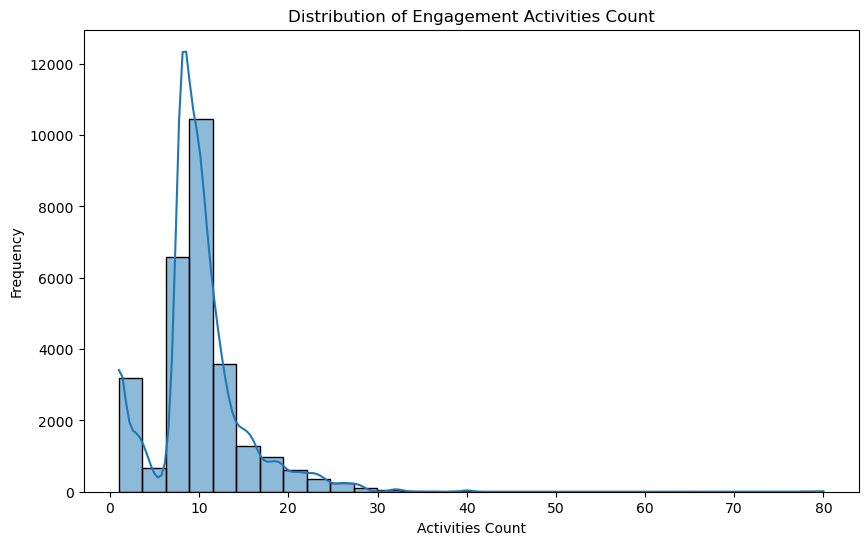

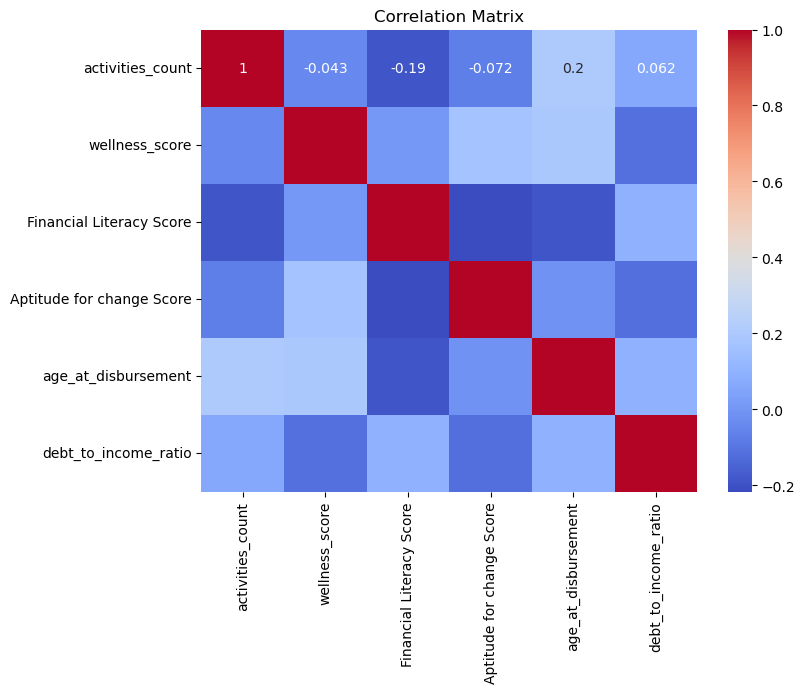

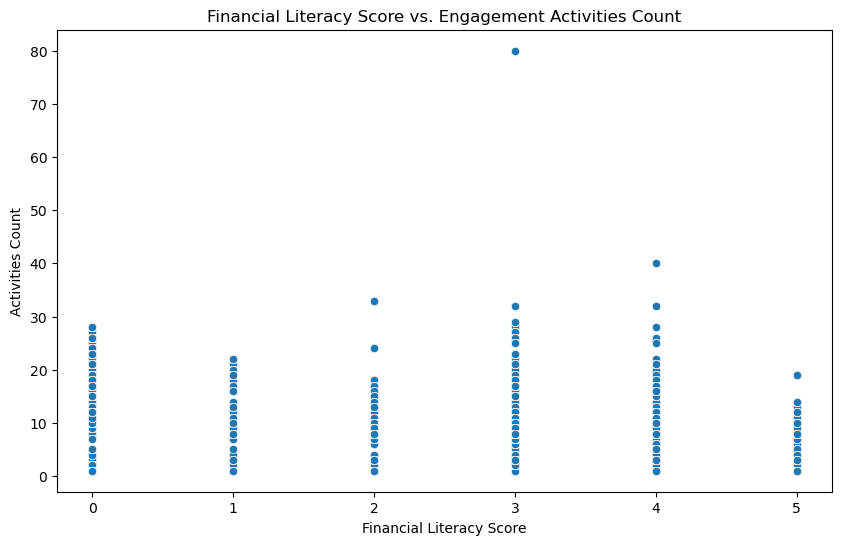

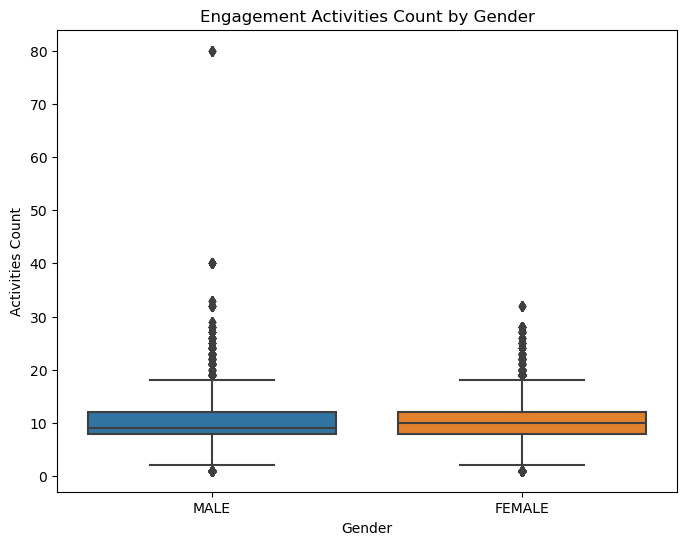

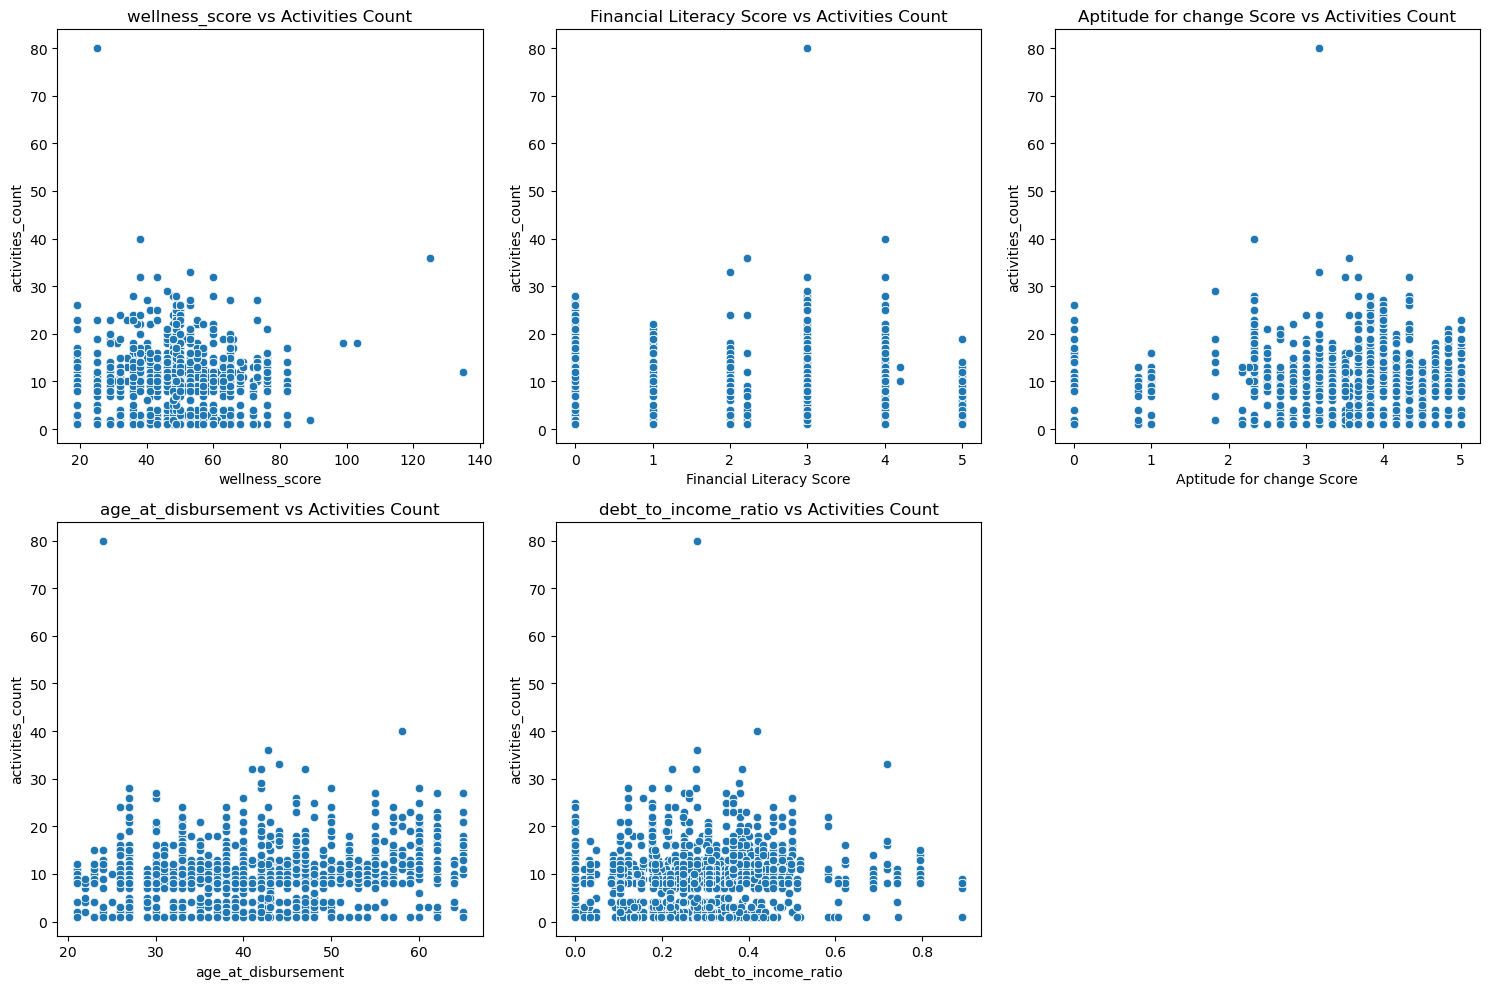

In [25]:
# Exploratory Data Analysis (EDA)

print("\nSummary Statistics:")
print(full_data.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Engagement Activities
plt.figure(figsize=(10, 6))
sns.histplot(full_data['activities_count'], bins=30, kde=True)
plt.title('Distribution of Engagement Activities Count')
plt.xlabel('Activities Count')
plt.ylabel('Frequency')
plt.show()

# Select numerical features for correlation
numerical_features = ['activities_count', 'wellness_score', 'Financial Literacy Score', 'Aptitude for change Score', 'age_at_disbursement', 'debt_to_income_ratio']

# Compute correlation matrix
corr_matrix = full_data[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Relationship between Financial Literacy Score and Activities Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=full_data, x='Financial Literacy Score', y='activities_count')
plt.title('Financial Literacy Score vs. Engagement Activities Count')
plt.xlabel('Financial Literacy Score')
plt.ylabel('Activities Count')
plt.show()

# Boxplot of Activities Count by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=full_data, x='Gender', y='activities_count')
plt.title('Engagement Activities Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Activities Count')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = [
    'wellness_score',
    'Financial Literacy Score',
    'Aptitude for change Score',
    'age_at_disbursement',
    'debt_to_income_ratio'
]

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=full_data_encoded, x=feature, y='activities_count')
    plt.title(f'{feature} vs Activities Count')
plt.tight_layout()
plt.show()

In [21]:
# Feature Engineering
# Define engagement level based on activities count
conditions = [
    (full_data['activities_count'] <= 5),
    (full_data['activities_count'] > 5) & (full_data['activities_count'] <= 15),
    (full_data['activities_count'] > 15)
]

choices = ['Low', 'Medium', 'High']
full_data['engagement_level'] = np.select(conditions, choices)

# One-Hot Encoding for categorical variables
category_column = full_data.select_dtypes(include=['object']).columns
print(category_column)
full_data_encoded = pd.get_dummies(full_data, columns=category_column, drop_first=True)

# Fill missing values in new features if necessary
# Step 1: Create a missing indicator
full_data_encoded['dti_missing'] = full_data_encoded['debt_to_income_ratio'].isnull().astype(int)

# Step 2: Perform predictive imputation using KNN Imputer
from sklearn.impute import KNNImputer

imputation_features = [
    'debt_to_income_ratio',
    'Outstanding Balance',
    'Qualified / Verified Income',
    'age_at_disbursement',
    'Financial Literacy Score',
    'Aptitude for change Score',
    # Include other relevant features if available
]

# Ensure all features are numeric and handle any missing values in predictors
for feature in imputation_features:
    full_data_encoded[feature] = pd.to_numeric(full_data_encoded[feature], errors='coerce')

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
full_data_encoded[imputation_features] = imputer.fit_transform(full_data_encoded[imputation_features])

Index(['customer_id', 'id-date', 'Loan Status', 'Gender', 'Province',
       'Residential Status', 'assessment_month', 'goal_no_new_debt',
       'goal_paid_bills_on_time', 'reason', 'under_utilization',
       'description1', 'description2', 'description3', 'engagement_level'],
      dtype='object')



Linear Regression Performance:
Mean Absolute Error (MAE): 3.26
Root Mean Squared Error (RMSE): 4.92
R-squared (R2 ): 0.11
Mean Absolute Percentage Error (MAPE): 86.98%
Adjusted R-squared (Adjusted R2): 0.10

Decision Tree Performance:
Mean Absolute Error (MAE): 1.84
Root Mean Squared Error (RMSE): 3.04
R-squared (R2 ): 0.66
Mean Absolute Percentage Error (MAPE): 40.42%
Adjusted R-squared (Adjusted R2): 0.66

Random Forest Performance:
Mean Absolute Error (MAE): 1.85
Root Mean Squared Error (RMSE): 3.04
R-squared (R2 ): 0.66
Mean Absolute Percentage Error (MAPE): 40.97%
Adjusted R-squared (Adjusted R2): 0.66

XGBoost Performance:
Mean Absolute Error (MAE): 2.06
Root Mean Squared Error (RMSE): 3.15
R-squared (R2 ): 0.64
Mean Absolute Percentage Error (MAPE): 47.01%
Adjusted R-squared (Adjusted R2): 0.63
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

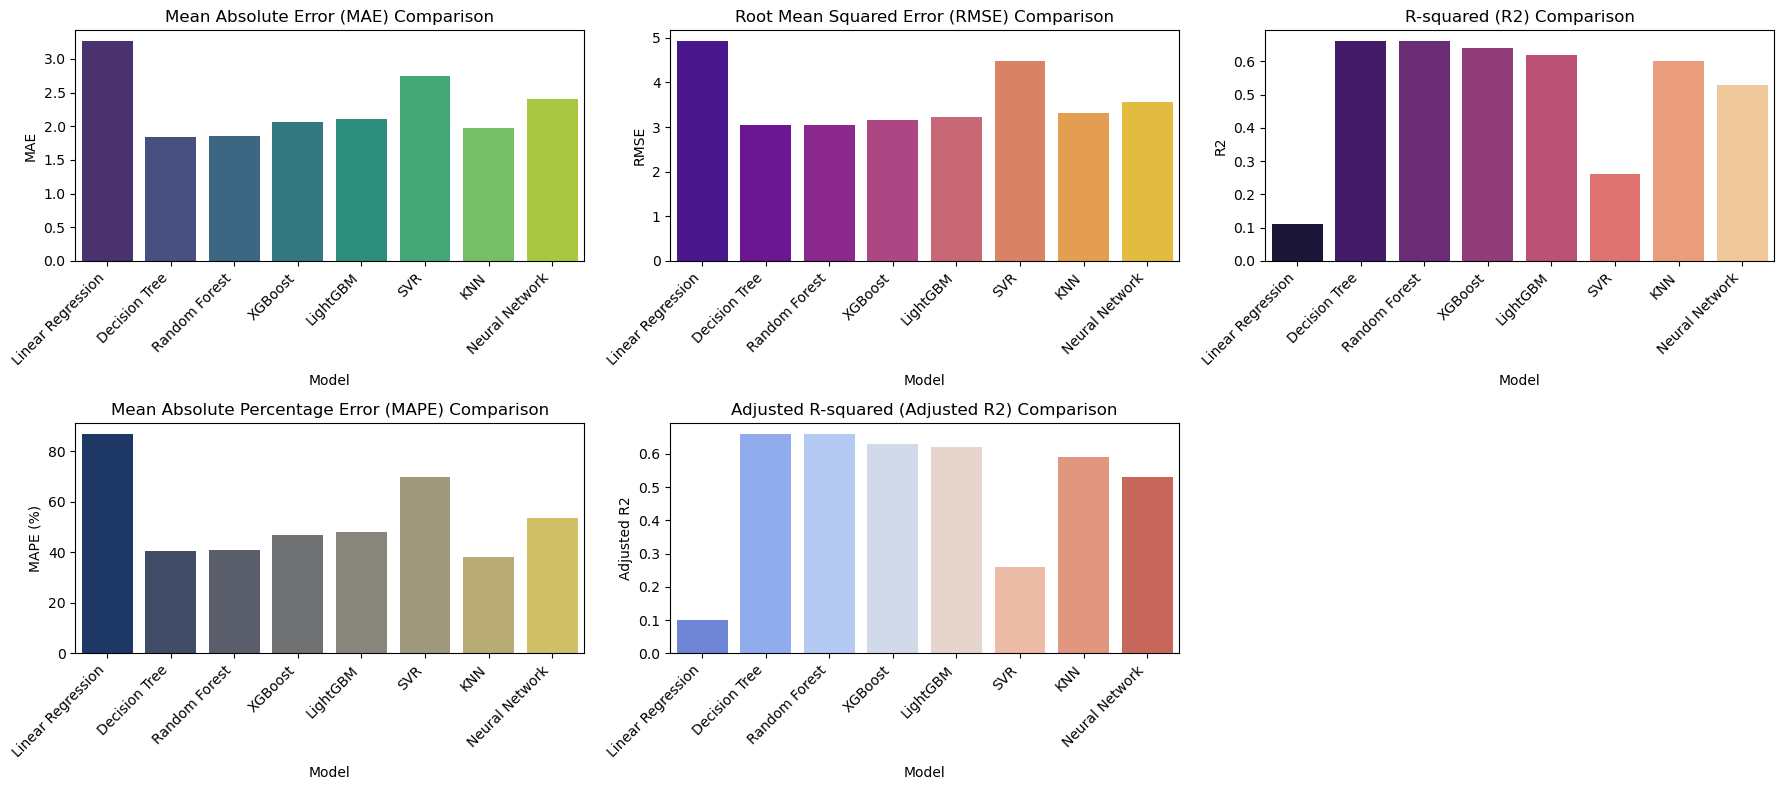


Best Regression Model: Decision Tree


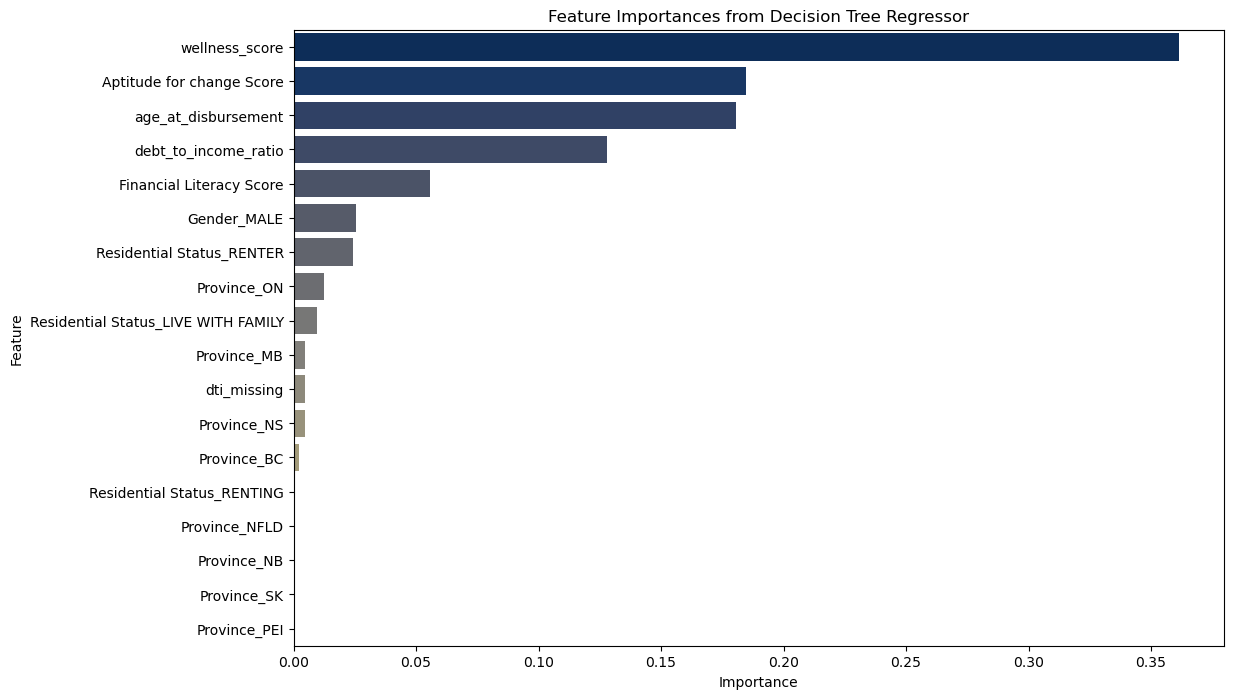


Cross-Validation for Decision Tree:
Cross-validated R² scores: [0.66264552 0.61705155 0.62157009 0.61202746 0.61232233]
Average cross-validated R²: 0.6251233897679077

Logistic Regression Performance:
AUC: 0.70
Accuracy: 0.63
Precision: 0.67
Recall: 0.53
F1-Score: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      2792
           1       0.67      0.53      0.60      2834

    accuracy                           0.63      5626
   macro avg       0.64      0.64      0.63      5626
weighted avg       0.64      0.63      0.63      5626



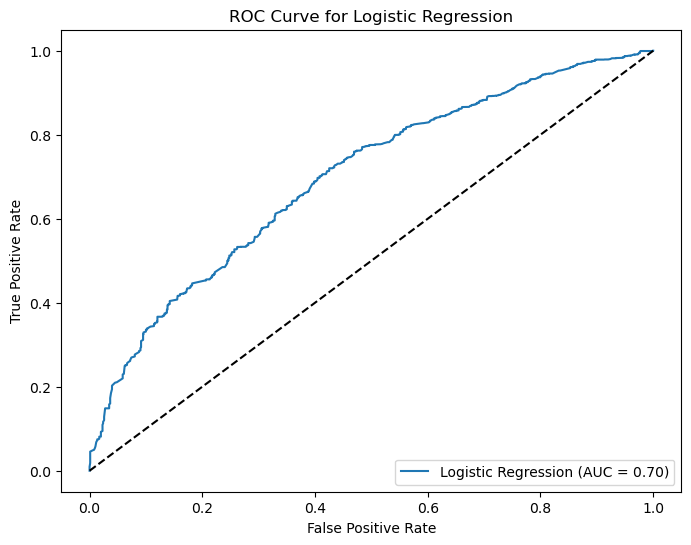


Random Forest Classifier Performance:
AUC: 0.93
Accuracy: 0.82
Precision: 0.85
Recall: 0.78
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2792
           1       0.85      0.78      0.82      2834

    accuracy                           0.82      5626
   macro avg       0.82      0.82      0.82      5626
weighted avg       0.82      0.82      0.82      5626



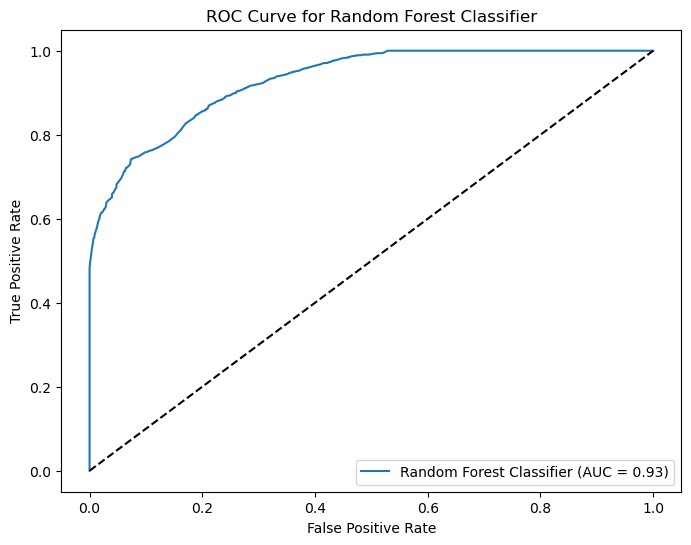


XGBoost Classifier Performance:
AUC: 0.91
Accuracy: 0.82
Precision: 0.86
Recall: 0.77
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2792
           1       0.86      0.77      0.81      2834

    accuracy                           0.82      5626
   macro avg       0.82      0.82      0.82      5626
weighted avg       0.82      0.82      0.82      5626



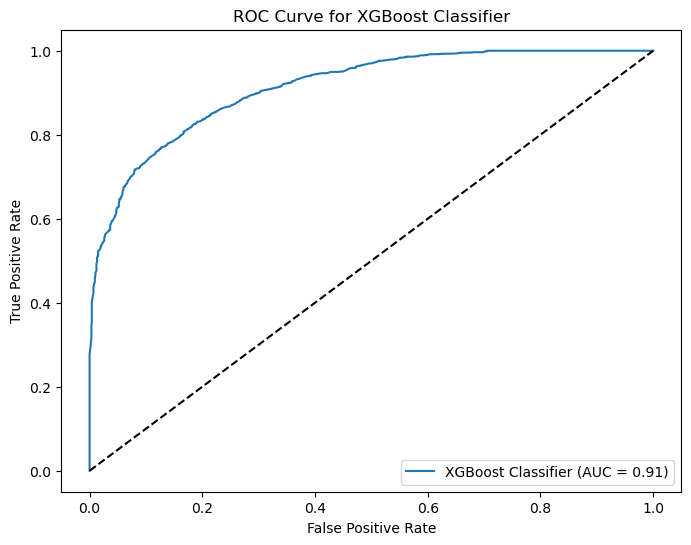

[LightGBM] [Info] Number of positive: 10912, number of negative: 11592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 22504, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484892 -> initscore=-0.060452
[LightGBM] [Info] Start training from score -0.060452

LightGBM Classifier Performance:
AUC: 0.92
Accuracy: 0.83
Precision: 0.86
Recall: 0.78
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2792
           1       0.86      0.78      0.82      2834

    accuracy                           0.83      5626
   macro avg       0.83      0.83      0.83      5626
weighted avg       0.83      0.83      0.83 

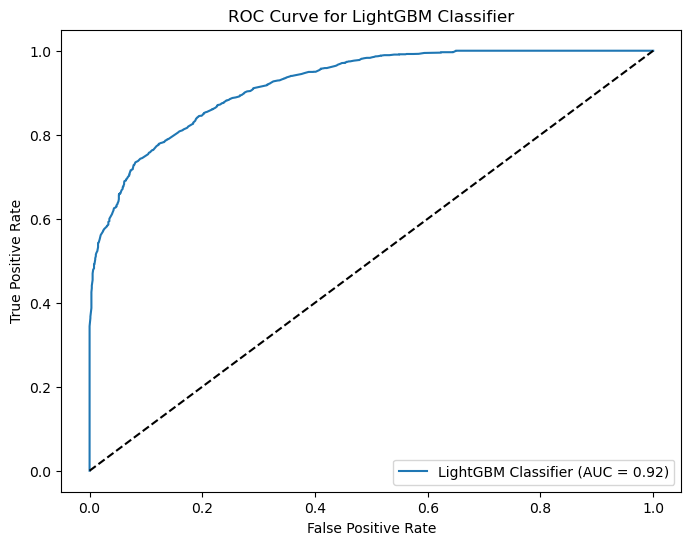


SVC Performance:
AUC: 0.79
Accuracy: 0.73
Precision: 0.75
Recall: 0.69
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2792
           1       0.75      0.69      0.72      2834

    accuracy                           0.73      5626
   macro avg       0.73      0.73      0.73      5626
weighted avg       0.73      0.73      0.73      5626



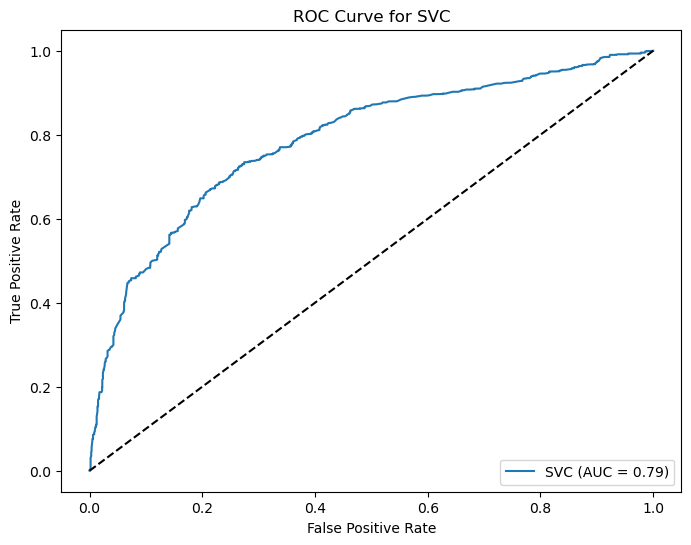


KNN Classifier Performance:
AUC: 0.89
Accuracy: 0.81
Precision: 0.85
Recall: 0.77
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2792
           1       0.85      0.77      0.81      2834

    accuracy                           0.81      5626
   macro avg       0.82      0.81      0.81      5626
weighted avg       0.82      0.81      0.81      5626



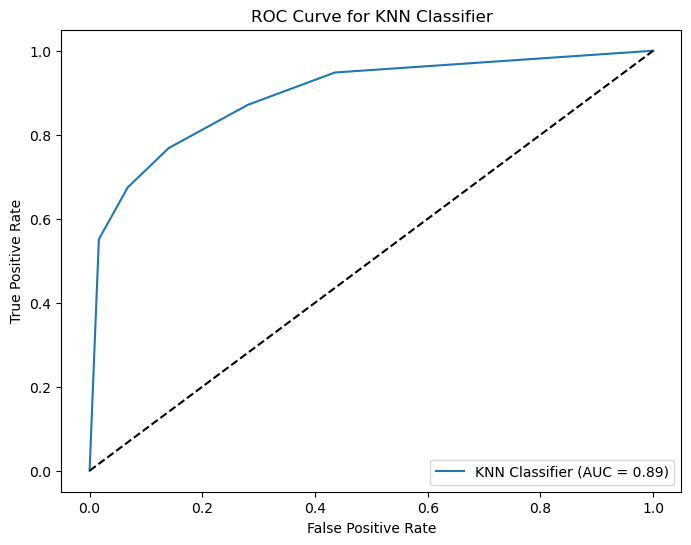


Neural Network Classifier Performance:
AUC: 0.89
Accuracy: 0.79
Precision: 0.78
Recall: 0.80
F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2792
           1       0.78      0.80      0.79      2834

    accuracy                           0.79      5626
   macro avg       0.79      0.79      0.79      5626
weighted avg       0.79      0.79      0.79      5626



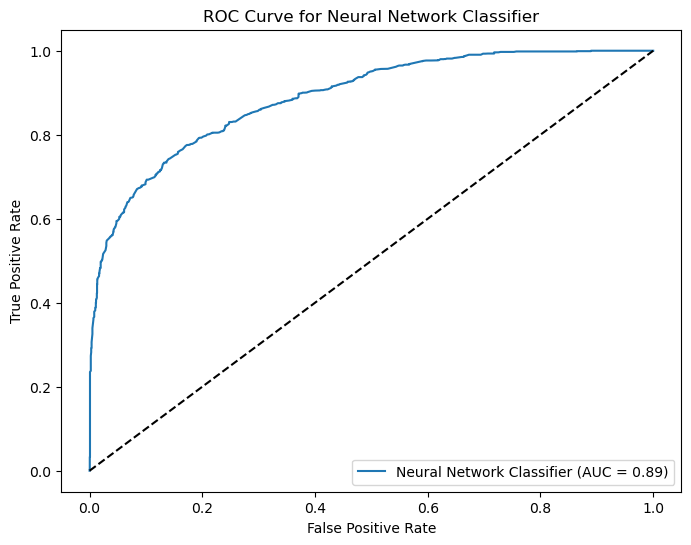


Classification Model Performance Comparison:
                       Model   AUC  Accuracy  Precision  Recall  F1-Score
1   Random Forest Classifier  0.93      0.82       0.85    0.78      0.82
3        LightGBM Classifier  0.92      0.83       0.86    0.78      0.82
2         XGBoost Classifier  0.91      0.82       0.86    0.77      0.81
5             KNN Classifier  0.89      0.81       0.85    0.77      0.81
6  Neural Network Classifier  0.89      0.79       0.78    0.80      0.79
4                        SVC  0.79      0.73       0.75    0.69      0.72
0        Logistic Regression  0.70      0.63       0.67    0.53      0.60


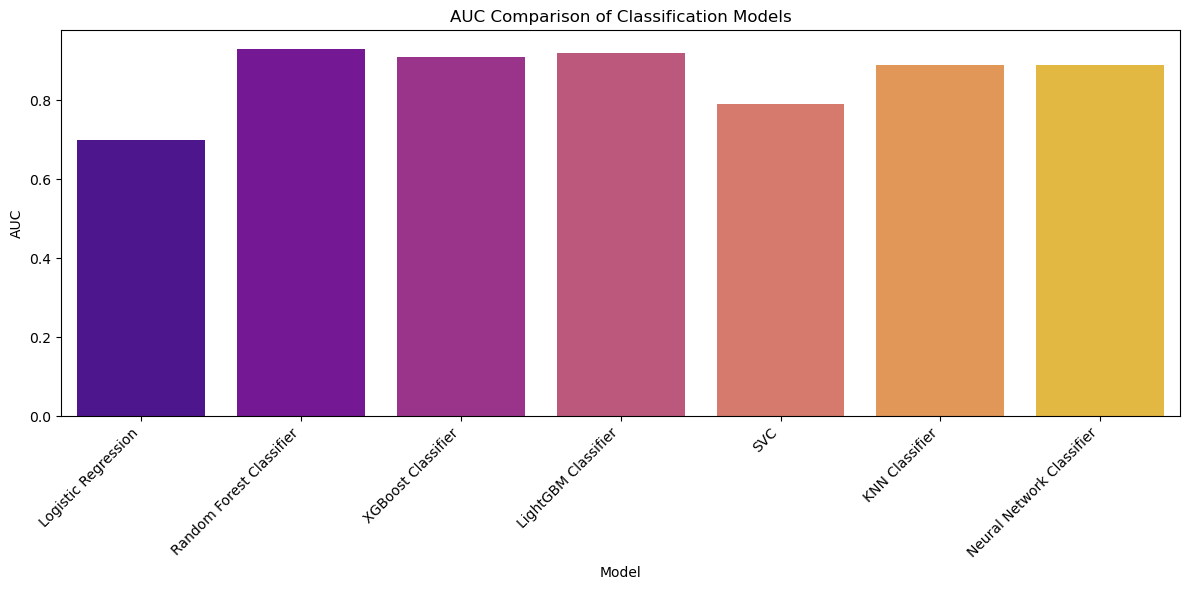

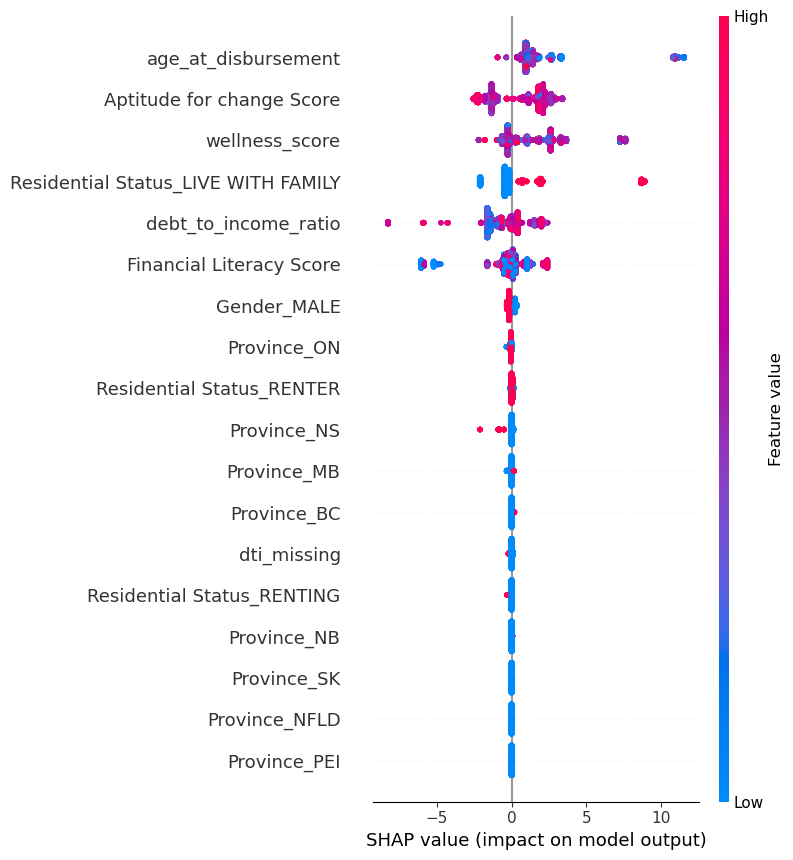

In [32]:
# ----------------------------
# 1. Import Necessary Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and evaluation metrics for Regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Models and evaluation metrics for Classification (Optional)
from sklearn.linear_model import LogisticRegression  # Added Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

# Optional: Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 2. Data Processing
# ----------------------------

# Assuming `full_data_encoded` is your preprocessed DataFrame
# Define feature columns
feature_columns = [
    'wellness_score',
    'Financial Literacy Score',
    'Aptitude for change Score',
    'age_at_disbursement',
    'debt_to_income_ratio',
    'dti_missing'  # Assuming you have created this indicator as previously discussed
] + [col for col in full_data_encoded.columns 
     if 'Gender_' in col or 'Province_' in col or 'Residential Status_' in col]

# Features and target for Regression
X = full_data_encoded[feature_columns]
y = full_data_encoded['activities_count']  # For regression

# Train-Test Split for Regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling for Regression
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 3. Initialize and Train Regression Models
# ----------------------------

# Dictionary to store regression models and their names
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=42
    ),  # Optimized parameters
    'XGBoost': xgb.XGBRegressor(
        objective='reg:squarederror', n_estimators=200, max_depth=None,
        learning_rate=0.1, random_state=42
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=200, max_depth=-1, min_split_gain=0, random_state=42
    ),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(
        hidden_layer_sizes=(100, 50), max_iter=500, random_state=42
    )
}

# Dictionary to store regression evaluation metrics
regression_performance = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R2': [],
    'MAPE (%)': [],
    'Adjusted R2': []
}

# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Train and Evaluate Regression Models
for model_name, model in regression_models.items():
    # Select appropriate data (scaled or unscaled)
    if model_name in ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'SVR', 'KNN', 'Neural Network']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        # Decision Tree doesn't require scaling
        X_tr = X_train
        X_te = X_test
    
    # Train the model
    model.fit(X_tr, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_te)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Handle division by zero in MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100 if not (y_test == 0).any() else np.nan
    n = X_test.shape[0]  # Number of observations
    k = X_test.shape[1]  # Number of predictors
    adj_r2 = adjusted_r2(r2, n, k)
    
    # Store metrics
    regression_performance['Model'].append(model_name)
    regression_performance['MAE'].append(round(mae, 2))
    regression_performance['RMSE'].append(round(rmse, 2))
    regression_performance['R2'].append(round(r2, 2))
    regression_performance['MAPE (%)'].append(round(mape, 2) if not np.isnan(mape) else 'NaN')
    regression_performance['Adjusted R2'].append(round(adj_r2, 2))
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2 ): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%" if not np.isnan(mape) else "Mean Absolute Percentage Error (MAPE): NaN")
    print(f"Adjusted R-squared (Adjusted R2): {adj_r2:.2f}")

# ----------------------------
# 4. Compare Regression Model Performance
# ----------------------------

# Create a DataFrame to compare regression models
regression_performance_df = pd.DataFrame(regression_performance)

print("\nRegression Model Performance Comparison:")
print(regression_performance_df.sort_values(by='R2', ascending=False))

# Visualize the performance
plt.figure(figsize=(18, 8))

# MAE Comparison
plt.subplot(2, 3, 1)
sns.barplot(data=regression_performance_df, x='Model', y='MAE', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')

# RMSE Comparison
plt.subplot(2, 3, 2)
sns.barplot(data=regression_performance_df, x='Model', y='RMSE', palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')

# R2 Comparison
plt.subplot(2, 3, 3)
sns.barplot(data=regression_performance_df, x='Model', y='R2', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('R-squared (R2) Comparison')
plt.ylabel('R2')
plt.xlabel('Model')

# MAPE Comparison
plt.subplot(2, 3, 4)
sns.barplot(data=regression_performance_df, x='Model', y='MAPE (%)', palette='cividis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.ylabel('MAPE (%)')
plt.xlabel('Model')

# Adjusted R2 Comparison
plt.subplot(2, 3, 5)
sns.barplot(data=regression_performance_df, x='Model', y='Adjusted R2', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Adjusted R-squared (Adjusted R2) Comparison')
plt.ylabel('Adjusted R2')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

# ----------------------------
# 5. Feature Importance for Best Regression Model
# ----------------------------

# Identify the best regression model based on R2
best_regression_model_name = regression_performance_df.sort_values(by='R2', ascending=False).iloc[0]['Model']
best_regression_model = regression_models[best_regression_model_name]

print(f"\nBest Regression Model: {best_regression_model_name}")

# Extract and plot feature importances
if best_regression_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='magma')
    plt.title(f'Feature Importances from {best_regression_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name == 'Linear Regression':
    # Coefficients as feature importance
    coefficients = best_regression_model.coef_
    feature_names = feature_columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature', palette='coolwarm')
    plt.title('Feature Coefficients from Linear Regression')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name == 'Decision Tree':
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='cividis')
    plt.title('Feature Importances from Decision Tree Regressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name in ['SVR', 'KNN', 'Neural Network']:
    print(f"{best_regression_model_name} does not provide straightforward feature importances.")

# ----------------------------
# 6. Hyperparameter Tuning for the Best Regression Model (Optional)
# ----------------------------

# Example: Hyperparameter Tuning for XGBoost (if it's the best model)
if best_regression_model_name == 'XGBoost':
    param_grid_xgb = {
        'n_estimators': [200, 300, 400],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0]
    }
    
    grid_search_xgb = GridSearchCV(
        estimator=xgb.XGBRegressor(
            objective='reg:squarederror', random_state=42
        ),
        param_grid=param_grid_xgb,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the grid search
    grid_search_xgb.fit(X_train_scaled, y_train)
    
    print("\nBest Parameters for XGBoost after Grid Search:")
    print(grid_search_xgb.best_params_)
    
    # Use the best estimator
    best_xgb = grid_search_xgb.best_estimator_
    
    # Predict on test data
    y_pred_best_xgb = best_xgb.predict(X_test_scaled)
    
    # Recalculate metrics
    mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
    mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
    rmse_best_xgb = np.sqrt(mse_best_xgb)
    r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
    mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb) * 100 if not (y_test == 0).any() else np.nan
    adj_r2_best_xgb = adjusted_r2(r2_best_xgb, X_test_scaled.shape[0], X_test_scaled.shape[1])
    
    print("\nOptimized XGBoost Performance:")
    print(f"Mean Absolute Error (MAE): {mae_best_xgb:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb:.2f}")
    print(f"R-squared (R2 ): {r2_best_xgb:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_best_xgb:.2f}%" if not np.isnan(mape_best_xgb) else "Mean Absolute Percentage Error (MAPE): NaN")
    print(f"Adjusted R-squared (Adjusted R2): {adj_r2_best_xgb:.2f}")
    
    # Optionally, add this to the performance comparison
    regression_performance_df = regression_performance_df.append({
        'Model': 'Optimized XGBoost',
        'MAE': round(mae_best_xgb, 2),
        'RMSE': round(rmse_best_xgb, 2),
        'R2': round(r2_best_xgb, 2),
        'MAPE (%)': round(mape_best_xgb, 2) if not np.isnan(mape_best_xgb) else 'NaN',
        'Adjusted R2': round(adj_r2_best_xgb, 2)
    }, ignore_index=True)
    
    print("\nUpdated Regression Model Performance Comparison:")
    print(regression_performance_df.sort_values(by='R2', ascending=False))
    
    # Plot updated performance
    plt.figure(figsize=(18, 8))

    # MAE Comparison
    plt.subplot(2, 3, 1)
    sns.barplot(data=regression_performance_df, x='Model', y='MAE', palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Absolute Error (MAE) Comparison')
    plt.ylabel('MAE')
    plt.xlabel('Model')

    # RMSE Comparison
    plt.subplot(2, 3, 2)
    sns.barplot(data=regression_performance_df, x='Model', y='RMSE', palette='plasma')
    plt.xticks(rotation=45, ha='right')
    plt.title('Root Mean Squared Error (RMSE) Comparison')
    plt.ylabel('RMSE')
    plt.xlabel('Model')

    # R2 Comparison
    plt.subplot(2, 3, 3)
    sns.barplot(data=regression_performance_df, x='Model', y='R2', palette='magma')
    plt.xticks(rotation=45, ha='right')
    plt.title('R-squared (R2) Comparison')
    plt.ylabel('R2')
    plt.xlabel('Model')

    # MAPE Comparison
    plt.subplot(2, 3, 4)
    sns.barplot(data=regression_performance_df, x='Model', y='MAPE (%)', palette='cividis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
    plt.ylabel('MAPE (%)')
    plt.xlabel('Model')

    # Adjusted R2 Comparison
    plt.subplot(2, 3, 5)
    sns.barplot(data=regression_performance_df, x='Model', y='Adjusted R2', palette='coolwarm')
    plt.xticks(rotation=45, ha='right')
    plt.title('Adjusted R-squared (Adjusted R2) Comparison')
    plt.ylabel('Adjusted R2')
    plt.xlabel('Model')

    plt.tight_layout()
    plt.show()

# ----------------------------
# 7. Cross-Validation for the Best Regression Model (Optional)
# ----------------------------

# Perform cross-validation to assess the best model's generalizability
print(f"\nCross-Validation for {best_regression_model_name}:")
cv_scores = cross_val_score(
    best_regression_model, X_train_scaled, y_train, cv=5, scoring='r2'
)
print("Cross-validated R² scores:", cv_scores)
print("Average cross-validated R²:", np.mean(cv_scores))

# ----------------------------
# 8. Optional: Converting Regression to Classification and Evaluating with AUC
# ----------------------------

# If you decide to transform your regression problem into a classification problem
# Here's how you can proceed

# a. Define Thresholds
# Example: Define High Engagement as activities_count above the median
threshold = y.median()
full_data_encoded['engagement_level'] = (full_data_encoded['activities_count'] > threshold).astype(int)

# Features and new target for classification
X_class = full_data_encoded[feature_columns]
y_class = full_data_encoded['engagement_level']

# Train-Test Split for Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Feature Scaling for Classification
scaler_cls = StandardScaler()

# Fit only on training data
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)

# Transform test data
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Initialize Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=42
    ),
    'XGBoost Classifier': xgb.XGBClassifier(
        use_label_encoder=False, eval_metric='logloss', n_estimators=200,
        max_depth=6, learning_rate=0.1, random_state=42
    ),
    'LightGBM Classifier': lgb.LGBMClassifier(
        n_estimators=200, max_depth=-1, learning_rate=0.1, random_state=42
    ),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    'Neural Network Classifier': MLPClassifier(
        hidden_layer_sizes=(100, 50), max_iter=500, random_state=42
    )
}

# Dictionary to store classification metrics
classification_performance = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and Evaluate Classification Models
for model_name, model in classification_models.items():
    # Select appropriate data (scaled or unscaled)
    if model_name in ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier',
                      'LightGBM Classifier', 'SVC', 'KNN Classifier', 'Neural Network Classifier']:
        X_tr_cls = X_train_cls_scaled
        X_te_cls = X_test_cls_scaled
    else:
        # If any model doesn't require scaling
        X_tr_cls = X_train_cls
        X_te_cls = X_test_cls
    
    # Train the model
    model.fit(X_tr_cls, y_train_cls)
    
    # Predict probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_prob_cls = model.predict_proba(X_te_cls)[:, 1]
    else:
        # Some models like SVC with probability=False
        y_prob_cls = model.decision_function(X_te_cls)
        y_prob_cls = (y_prob_cls - y_prob_cls.min()) / (y_prob_cls.max() - y_prob_cls.min())  # Normalize to [0,1]
    
    # Predict class labels
    y_pred_cls = model.predict(X_te_cls)
    
    # Calculate AUC
    auc = roc_auc_score(y_test_cls, y_prob_cls)
    
    # Calculate other metrics
    acc = accuracy_score(y_test_cls, y_pred_cls)
    prec = precision_score(y_test_cls, y_pred_cls, zero_division=0)
    rec = recall_score(y_test_cls, y_pred_cls, zero_division=0)
    f1 = f1_score(y_test_cls, y_pred_cls, zero_division=0)
    
    # Store metrics
    classification_performance['Model'].append(model_name)
    classification_performance['AUC'].append(round(auc, 2))
    classification_performance['Accuracy'].append(round(acc, 2))
    classification_performance['Precision'].append(round(prec, 2))
    classification_performance['Recall'].append(round(rec, 2))
    classification_performance['F1-Score'].append(round(f1, 2))
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"AUC: {auc:.2f}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_cls, y_pred_cls, zero_division=0))
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_prob_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Create a DataFrame to compare classification models
classification_performance_df = pd.DataFrame(classification_performance)

print("\nClassification Model Performance Comparison:")
print(classification_performance_df.sort_values(by='AUC', ascending=False))

# Visualize AUC comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=classification_performance_df, x='Model', y='AUC', palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('AUC Comparison of Classification Models')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# ----------------------------
# 9. Final Recommendations and Next Steps
# ----------------------------

if best_regression_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='magma')
    plt.title(f'Feature Importances from {best_regression_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    
import shap

# Initialize SHAP Explainer for tree-based models
explainer = shap.TreeExplainer(best_regression_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_columns)


Linear Regression Performance:
Mean Absolute Error (MAE): 3.28
Root Mean Squared Error (RMSE): 4.95
R-squared (R2 ): 0.10
Mean Absolute Percentage Error (MAPE): 89.24%
Adjusted R-squared (Adjusted R2): 0.09

Decision Tree Performance:
Mean Absolute Error (MAE): 1.84
Root Mean Squared Error (RMSE): 3.04
R-squared (R2 ): 0.66
Mean Absolute Percentage Error (MAPE): 40.40%
Adjusted R-squared (Adjusted R2): 0.66

Random Forest Performance:
Mean Absolute Error (MAE): 1.85
Root Mean Squared Error (RMSE): 3.04
R-squared (R2 ): 0.66
Mean Absolute Percentage Error (MAPE): 40.93%
Adjusted R-squared (Adjusted R2): 0.66

XGBoost Performance:
Mean Absolute Error (MAE): 2.06
Root Mean Squared Error (RMSE): 3.15
R-squared (R2 ): 0.63
Mean Absolute Percentage Error (MAPE): 47.34%
Adjusted R-squared (Adjusted R2): 0.63
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

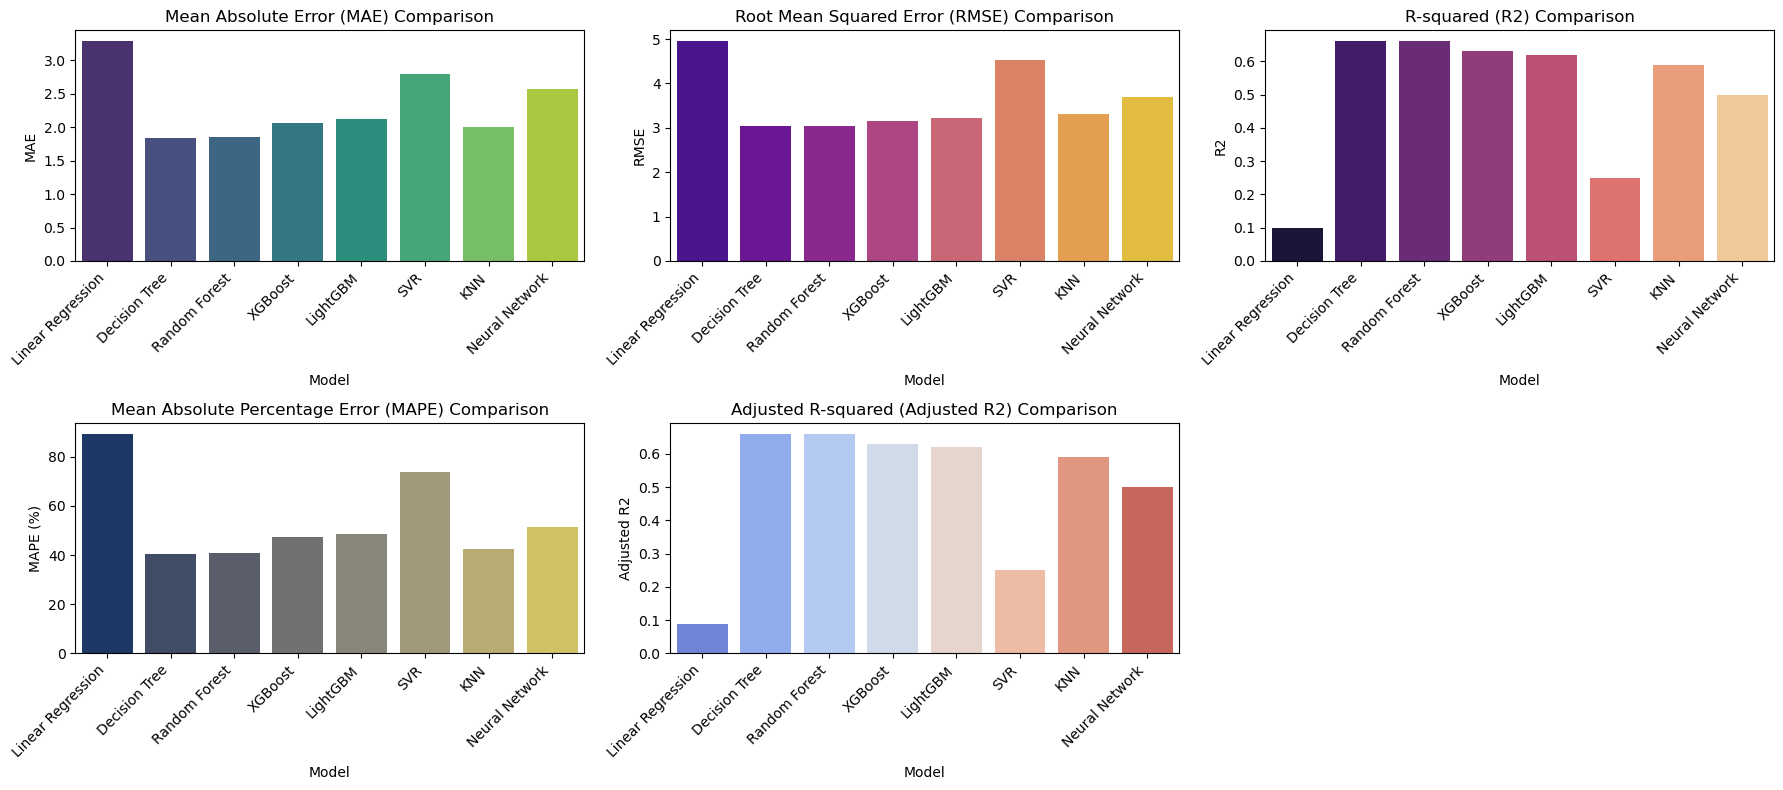


Best Regression Model: Decision Tree


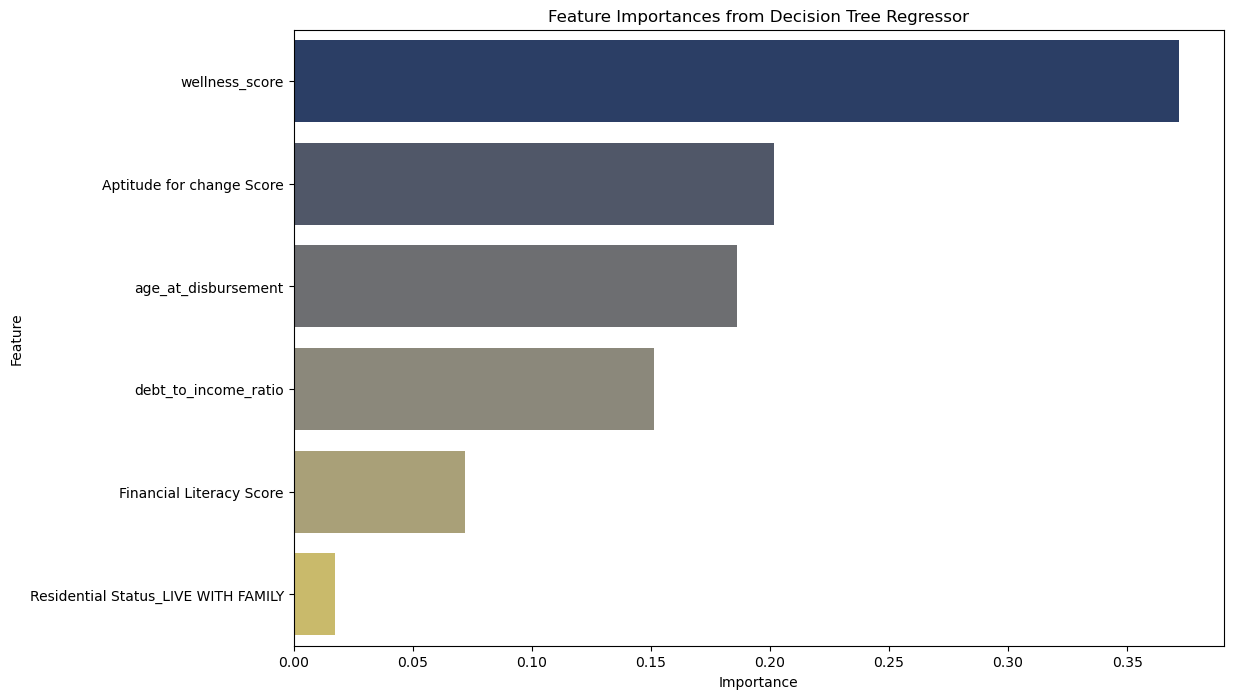


Cross-Validation for Decision Tree:
Cross-validated R² scores: [0.66309455 0.61958677 0.61609517 0.61207951 0.61514493]
Average cross-validated R²: 0.6252001856994116

Logistic Regression Performance:
AUC: 0.68
Accuracy: 0.64
Precision: 0.67
Recall: 0.58
F1-Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      2792
           1       0.67      0.58      0.62      2834

    accuracy                           0.64      5626
   macro avg       0.65      0.64      0.64      5626
weighted avg       0.65      0.64      0.64      5626



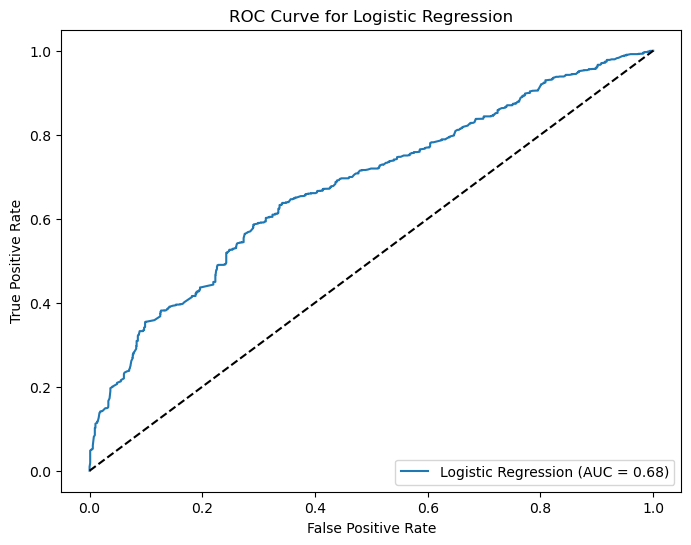


Random Forest Classifier Performance:
AUC: 0.93
Accuracy: 0.82
Precision: 0.85
Recall: 0.78
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2792
           1       0.85      0.78      0.82      2834

    accuracy                           0.82      5626
   macro avg       0.82      0.82      0.82      5626
weighted avg       0.82      0.82      0.82      5626



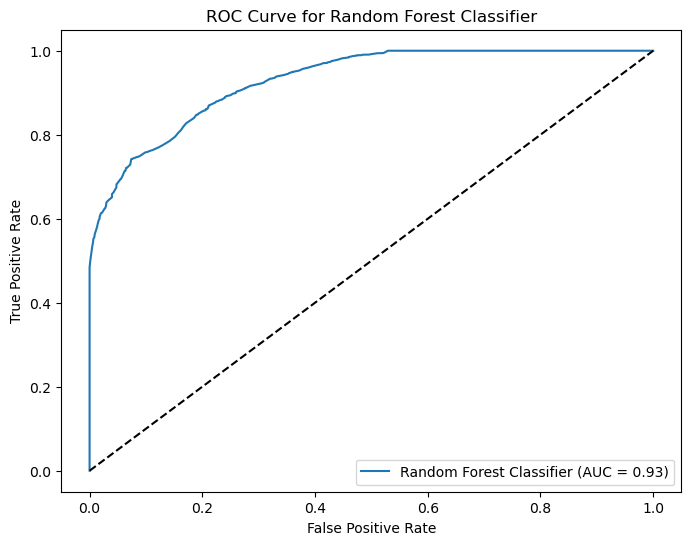


XGBoost Classifier Performance:
AUC: 0.91
Accuracy: 0.82
Precision: 0.85
Recall: 0.78
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2792
           1       0.85      0.78      0.81      2834

    accuracy                           0.82      5626
   macro avg       0.82      0.82      0.82      5626
weighted avg       0.82      0.82      0.82      5626



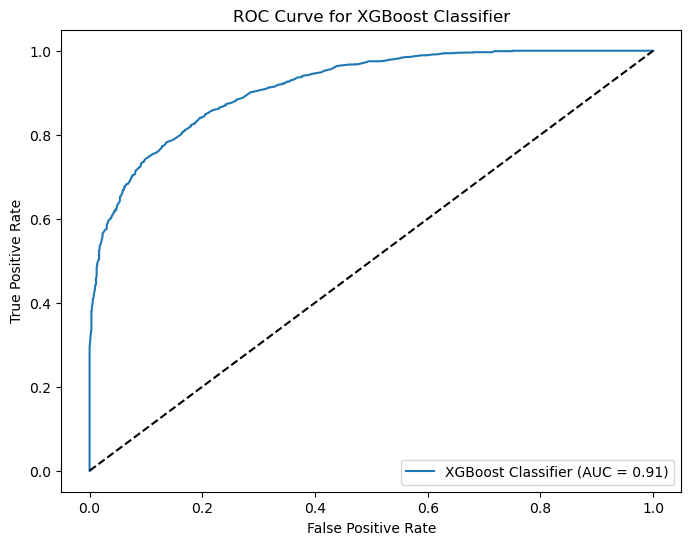

[LightGBM] [Info] Number of positive: 10912, number of negative: 11592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 22504, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484892 -> initscore=-0.060452
[LightGBM] [Info] Start training from score -0.060452

LightGBM Classifier Performance:
AUC: 0.92
Accuracy: 0.82
Precision: 0.85
Recall: 0.78
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2792
           1       0.85      0.78      0.82      2834

    accuracy                           0.82      5626
   macro avg       0.83      0.82      0.82      5626
weighted avg       0.83      0.82      0.82      5626



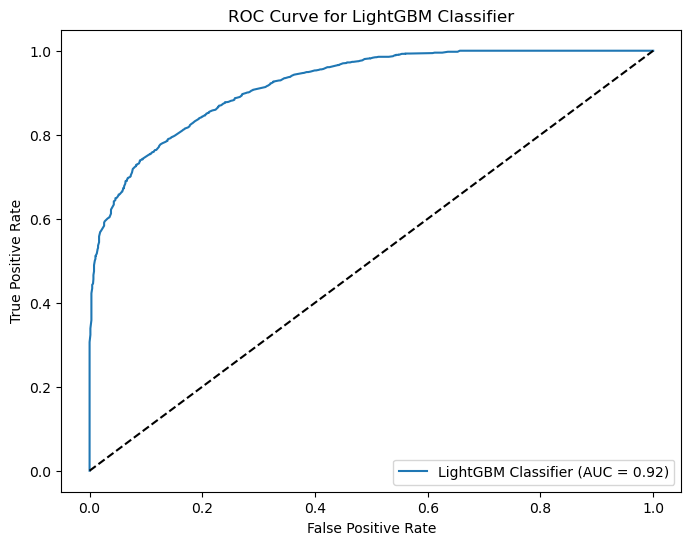


SVC Performance:
AUC: 0.77
Accuracy: 0.71
Precision: 0.76
Recall: 0.60
F1-Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      2792
           1       0.76      0.60      0.67      2834

    accuracy                           0.71      5626
   macro avg       0.72      0.71      0.70      5626
weighted avg       0.72      0.71      0.70      5626



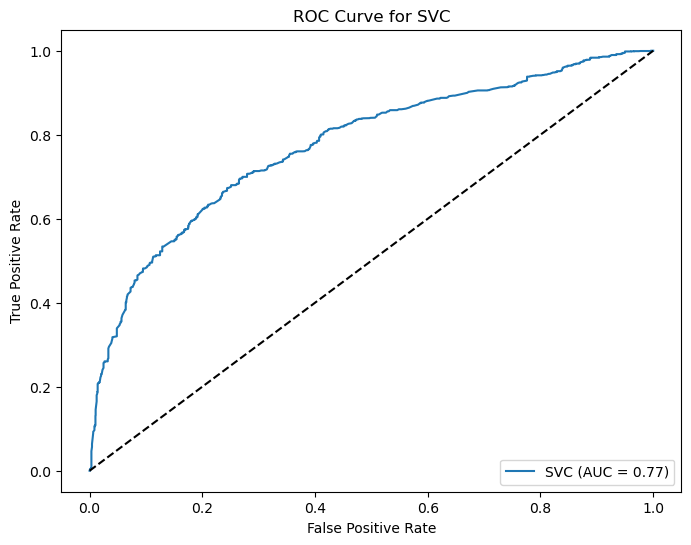


KNN Classifier Performance:
AUC: 0.89
Accuracy: 0.81
Precision: 0.84
Recall: 0.78
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2792
           1       0.84      0.78      0.81      2834

    accuracy                           0.81      5626
   macro avg       0.82      0.82      0.81      5626
weighted avg       0.82      0.81      0.81      5626



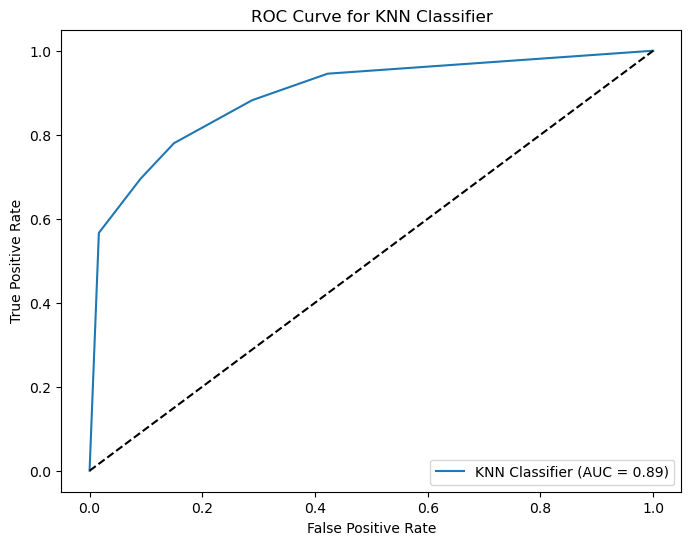


Neural Network Classifier Performance:
AUC: 0.89
Accuracy: 0.80
Precision: 0.83
Recall: 0.76
F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80      2792
           1       0.83      0.76      0.79      2834

    accuracy                           0.80      5626
   macro avg       0.80      0.80      0.80      5626
weighted avg       0.80      0.80      0.80      5626



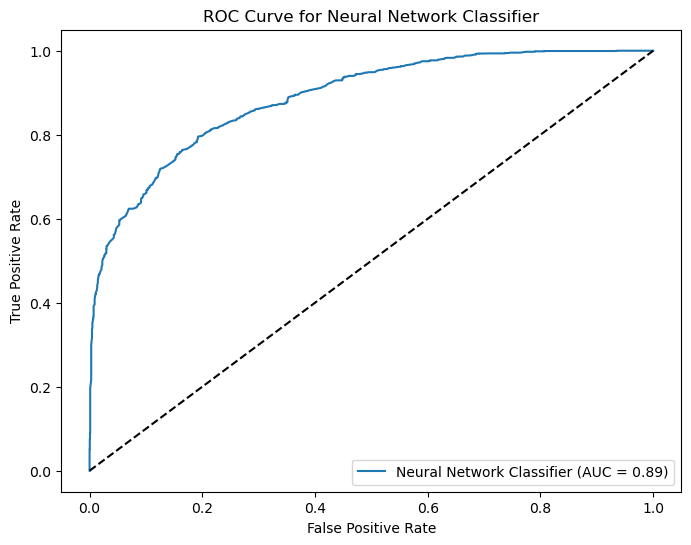


Classification Model Performance Comparison:
                       Model   AUC  Accuracy  Precision  Recall  F1-Score
1   Random Forest Classifier  0.93      0.82       0.85    0.78      0.82
3        LightGBM Classifier  0.92      0.82       0.85    0.78      0.82
2         XGBoost Classifier  0.91      0.82       0.85    0.78      0.81
5             KNN Classifier  0.89      0.81       0.84    0.78      0.81
6  Neural Network Classifier  0.89      0.80       0.83    0.76      0.79
4                        SVC  0.77      0.71       0.76    0.60      0.67
0        Logistic Regression  0.68      0.64       0.67    0.58      0.62


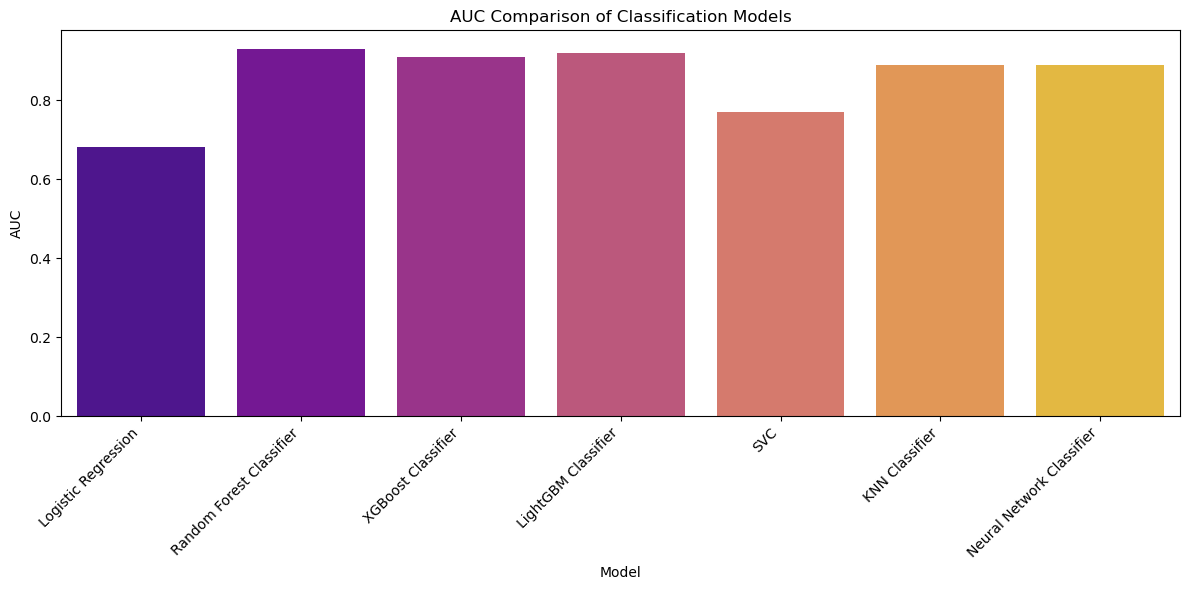

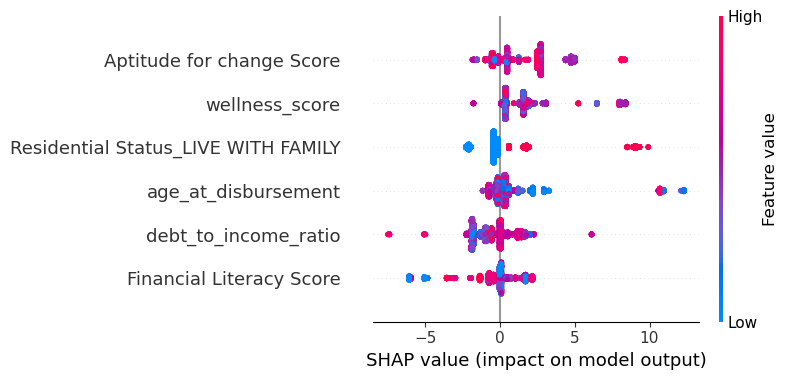

In [42]:
# Assuming `full_data_encoded` is your preprocessed DataFrame
# Define feature columns
feature_columns = [
    'wellness_score',
    'Financial Literacy Score',
    'Aptitude for change Score',
    'age_at_disbursement',
    'debt_to_income_ratio',
    'dti_missing'  # Assuming you have created this indicator as previously discussed
] + [col for col in full_data_encoded.columns 
     if 'Gender_' in col or 'Province_' in col or 'Residential Status_' in col]

# Features and target for Regression
X = full_data_encoded[feature_columns]
feature_columns_new = ['wellness_score', 'Financial Literacy Score', 'Aptitude for change Score', 'age_at_disbursement',  'debt_to_income_ratio','Residential Status_LIVE WITH FAMILY']
X = X[feature_columns_new]
y = full_data_encoded['activities_count']  # For regression

# Train-Test Split for Regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling for Regression
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 3. Initialize and Train Regression Models
# ----------------------------

# Dictionary to store regression models and their names
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=42
    ),  # Optimized parameters
    'XGBoost': xgb.XGBRegressor(
        objective='reg:squarederror', n_estimators=200, max_depth=None,
        learning_rate=0.1, random_state=42
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=200, max_depth=-1, min_split_gain=0, random_state=42
    ),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(
        hidden_layer_sizes=(100, 50), max_iter=500, random_state=42
    )
}

# Dictionary to store regression evaluation metrics
regression_performance = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R2': [],
    'MAPE (%)': [],
    'Adjusted R2': []
}

# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Train and Evaluate Regression Models
for model_name, model in regression_models.items():
    # Select appropriate data (scaled or unscaled)
    if model_name in ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'SVR', 'KNN', 'Neural Network']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        # Decision Tree doesn't require scaling
        X_tr = X_train
        X_te = X_test
    
    # Train the model
    model.fit(X_tr, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_te)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Handle division by zero in MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100 if not (y_test == 0).any() else np.nan
    n = X_test.shape[0]  # Number of observations
    k = X_test.shape[1]  # Number of predictors
    adj_r2 = adjusted_r2(r2, n, k)
    
    # Store metrics
    regression_performance['Model'].append(model_name)
    regression_performance['MAE'].append(round(mae, 2))
    regression_performance['RMSE'].append(round(rmse, 2))
    regression_performance['R2'].append(round(r2, 2))
    regression_performance['MAPE (%)'].append(round(mape, 2) if not np.isnan(mape) else 'NaN')
    regression_performance['Adjusted R2'].append(round(adj_r2, 2))
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2 ): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%" if not np.isnan(mape) else "Mean Absolute Percentage Error (MAPE): NaN")
    print(f"Adjusted R-squared (Adjusted R2): {adj_r2:.2f}")

# ----------------------------
# 4. Compare Regression Model Performance
# ----------------------------

# Create a DataFrame to compare regression models
regression_performance_df = pd.DataFrame(regression_performance)

print("\nRegression Model Performance Comparison:")
print(regression_performance_df.sort_values(by='R2', ascending=False))

# Visualize the performance
plt.figure(figsize=(18, 8))

# MAE Comparison
plt.subplot(2, 3, 1)
sns.barplot(data=regression_performance_df, x='Model', y='MAE', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')

# RMSE Comparison
plt.subplot(2, 3, 2)
sns.barplot(data=regression_performance_df, x='Model', y='RMSE', palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')

# R2 Comparison
plt.subplot(2, 3, 3)
sns.barplot(data=regression_performance_df, x='Model', y='R2', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('R-squared (R2) Comparison')
plt.ylabel('R2')
plt.xlabel('Model')

# MAPE Comparison
plt.subplot(2, 3, 4)
sns.barplot(data=regression_performance_df, x='Model', y='MAPE (%)', palette='cividis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.ylabel('MAPE (%)')
plt.xlabel('Model')

# Adjusted R2 Comparison
plt.subplot(2, 3, 5)
sns.barplot(data=regression_performance_df, x='Model', y='Adjusted R2', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Adjusted R-squared (Adjusted R2) Comparison')
plt.ylabel('Adjusted R2')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

# ----------------------------
# 5. Feature Importance for Best Regression Model
# ----------------------------

# Identify the best regression model based on R2
best_regression_model_name = regression_performance_df.sort_values(by='R2', ascending=False).iloc[0]['Model']
best_regression_model = regression_models[best_regression_model_name]

print(f"\nBest Regression Model: {best_regression_model_name}")

# Extract and plot feature importances
if best_regression_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns_new
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='magma')
    plt.title(f'Feature Importances from {best_regression_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name == 'Linear Regression':
    # Coefficients as feature importance
    coefficients = best_regression_model.coef_
    feature_names = feature_columns_new
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature', palette='coolwarm')
    plt.title('Feature Coefficients from Linear Regression')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name == 'Decision Tree':
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns_new
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='cividis')
    plt.title('Feature Importances from Decision Tree Regressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

elif best_regression_model_name in ['SVR', 'KNN', 'Neural Network']:
    print(f"{best_regression_model_name} does not provide straightforward feature importances.")

# ----------------------------
# 6. Hyperparameter Tuning for the Best Regression Model (Optional)
# ----------------------------

# Example: Hyperparameter Tuning for XGBoost (if it's the best model)
if best_regression_model_name == 'XGBoost':
    param_grid_xgb = {
        'n_estimators': [200, 300, 400],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0]
    }
    
    grid_search_xgb = GridSearchCV(
        estimator=xgb.XGBRegressor(
            objective='reg:squarederror', random_state=42
        ),
        param_grid=param_grid_xgb,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the grid search
    grid_search_xgb.fit(X_train_scaled, y_train)
    
    print("\nBest Parameters for XGBoost after Grid Search:")
    print(grid_search_xgb.best_params_)
    
    # Use the best estimator
    best_xgb = grid_search_xgb.best_estimator_
    
    # Predict on test data
    y_pred_best_xgb = best_xgb.predict(X_test_scaled)
    
    # Recalculate metrics
    mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
    mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
    rmse_best_xgb = np.sqrt(mse_best_xgb)
    r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
    mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb) * 100 if not (y_test == 0).any() else np.nan
    adj_r2_best_xgb = adjusted_r2(r2_best_xgb, X_test_scaled.shape[0], X_test_scaled.shape[1])
    
    print("\nOptimized XGBoost Performance:")
    print(f"Mean Absolute Error (MAE): {mae_best_xgb:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb:.2f}")
    print(f"R-squared (R2 ): {r2_best_xgb:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_best_xgb:.2f}%" if not np.isnan(mape_best_xgb) else "Mean Absolute Percentage Error (MAPE): NaN")
    print(f"Adjusted R-squared (Adjusted R2): {adj_r2_best_xgb:.2f}")
    
    # Optionally, add this to the performance comparison
    regression_performance_df = regression_performance_df.append({
        'Model': 'Optimized XGBoost',
        'MAE': round(mae_best_xgb, 2),
        'RMSE': round(rmse_best_xgb, 2),
        'R2': round(r2_best_xgb, 2),
        'MAPE (%)': round(mape_best_xgb, 2) if not np.isnan(mape_best_xgb) else 'NaN',
        'Adjusted R2': round(adj_r2_best_xgb, 2)
    }, ignore_index=True)
    
    print("\nUpdated Regression Model Performance Comparison:")
    print(regression_performance_df.sort_values(by='R2', ascending=False))
    
    # Plot updated performance
    plt.figure(figsize=(18, 8))

    # MAE Comparison
    plt.subplot(2, 3, 1)
    sns.barplot(data=regression_performance_df, x='Model', y='MAE', palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Absolute Error (MAE) Comparison')
    plt.ylabel('MAE')
    plt.xlabel('Model')

    # RMSE Comparison
    plt.subplot(2, 3, 2)
    sns.barplot(data=regression_performance_df, x='Model', y='RMSE', palette='plasma')
    plt.xticks(rotation=45, ha='right')
    plt.title('Root Mean Squared Error (RMSE) Comparison')
    plt.ylabel('RMSE')
    plt.xlabel('Model')

    # R2 Comparison
    plt.subplot(2, 3, 3)
    sns.barplot(data=regression_performance_df, x='Model', y='R2', palette='magma')
    plt.xticks(rotation=45, ha='right')
    plt.title('R-squared (R2) Comparison')
    plt.ylabel('R2')
    plt.xlabel('Model')

    # MAPE Comparison
    plt.subplot(2, 3, 4)
    sns.barplot(data=regression_performance_df, x='Model', y='MAPE (%)', palette='cividis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
    plt.ylabel('MAPE (%)')
    plt.xlabel('Model')

    # Adjusted R2 Comparison
    plt.subplot(2, 3, 5)
    sns.barplot(data=regression_performance_df, x='Model', y='Adjusted R2', palette='coolwarm')
    plt.xticks(rotation=45, ha='right')
    plt.title('Adjusted R-squared (Adjusted R2) Comparison')
    plt.ylabel('Adjusted R2')
    plt.xlabel('Model')

    plt.tight_layout()
    plt.show()

# ----------------------------
# 7. Cross-Validation for the Best Regression Model (Optional)
# ----------------------------

# Perform cross-validation to assess the best model's generalizability
print(f"\nCross-Validation for {best_regression_model_name}:")
cv_scores = cross_val_score(
    best_regression_model, X_train_scaled, y_train, cv=5, scoring='r2'
)
print("Cross-validated R² scores:", cv_scores)
print("Average cross-validated R²:", np.mean(cv_scores))

# ----------------------------
# 8. Optional: Converting Regression to Classification and Evaluating with AUC
# ----------------------------

# If you decide to transform your regression problem into a classification problem
# Here's how you can proceed

# a. Define Thresholds
# Example: Define High Engagement as activities_count above the median
threshold = y.median()
full_data_encoded['engagement_level'] = (full_data_encoded['activities_count'] > threshold).astype(int)

# Features and new target for classification
X_class = full_data_encoded[feature_columns_new]
y_class = full_data_encoded['engagement_level']

# Train-Test Split for Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Feature Scaling for Classification
scaler_cls = StandardScaler()

# Fit only on training data
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)

# Transform test data
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Initialize Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=42
    ),
    'XGBoost Classifier': xgb.XGBClassifier(
        use_label_encoder=False, eval_metric='logloss', n_estimators=200,
        max_depth=6, learning_rate=0.1, random_state=42
    ),
    'LightGBM Classifier': lgb.LGBMClassifier(
        n_estimators=200, max_depth=-1, learning_rate=0.1, random_state=42
    ),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    'Neural Network Classifier': MLPClassifier(
        hidden_layer_sizes=(100, 50), max_iter=500, random_state=42
    )
}

# Dictionary to store classification metrics
classification_performance = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and Evaluate Classification Models
for model_name, model in classification_models.items():
    # Select appropriate data (scaled or unscaled)
    if model_name in ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier',
                      'LightGBM Classifier', 'SVC', 'KNN Classifier', 'Neural Network Classifier']:
        X_tr_cls = X_train_cls_scaled
        X_te_cls = X_test_cls_scaled
    else:
        # If any model doesn't require scaling
        X_tr_cls = X_train_cls
        X_te_cls = X_test_cls
    
    # Train the model
    model.fit(X_tr_cls, y_train_cls)
    
    # Predict probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_prob_cls = model.predict_proba(X_te_cls)[:, 1]
    else:
        # Some models like SVC with probability=False
        y_prob_cls = model.decision_function(X_te_cls)
        y_prob_cls = (y_prob_cls - y_prob_cls.min()) / (y_prob_cls.max() - y_prob_cls.min())  # Normalize to [0,1]
    
    # Predict class labels
    y_pred_cls = model.predict(X_te_cls)
    
    # Calculate AUC
    auc = roc_auc_score(y_test_cls, y_prob_cls)
    
    # Calculate other metrics
    acc = accuracy_score(y_test_cls, y_pred_cls)
    prec = precision_score(y_test_cls, y_pred_cls, zero_division=0)
    rec = recall_score(y_test_cls, y_pred_cls, zero_division=0)
    f1 = f1_score(y_test_cls, y_pred_cls, zero_division=0)
    
    # Store metrics
    classification_performance['Model'].append(model_name)
    classification_performance['AUC'].append(round(auc, 2))
    classification_performance['Accuracy'].append(round(acc, 2))
    classification_performance['Precision'].append(round(prec, 2))
    classification_performance['Recall'].append(round(rec, 2))
    classification_performance['F1-Score'].append(round(f1, 2))
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"AUC: {auc:.2f}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_cls, y_pred_cls, zero_division=0))
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_prob_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Create a DataFrame to compare classification models
classification_performance_df = pd.DataFrame(classification_performance)

print("\nClassification Model Performance Comparison:")
print(classification_performance_df.sort_values(by='AUC', ascending=False))

# Visualize AUC comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=classification_performance_df, x='Model', y='AUC', palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('AUC Comparison of Classification Models')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# ----------------------------
# 9. Final Recommendations and Next Steps
# ----------------------------

if best_regression_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    importances = best_regression_model.feature_importances_
    feature_names = feature_columns_new
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='magma')
    plt.title(f'Feature Importances from {best_regression_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    
import shap

# Initialize SHAP Explainer for tree-based models
explainer = shap.TreeExplainer(best_regression_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_columns_new)